<a href="https://colab.research.google.com/github/kushagrasanghi/Flight_Analysis/blob/main/Flight_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Flight_data.xlsx to Flight_data.xlsx


In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


import gdown
import pandas as pd

data = pd.read_excel('Flight_data.xlsx')

# Print the data
print(data.head())

       Airline Date_of_Journey   Source Destination                  Route  \
0          PIA      24/03/2019  lahore      peshwar              BLR → DEL   
1      AIRSAIL       1/05/2019   multan         Isb  CCU → IXR → BBI → BLR   
2         PIA.       9/06/2019  karachi     sailkot  DEL → LKO → BOM → COK   
3     Airblue.      12/05/2019  peshwar     lahore         CCU → NAG → BLR   
4  Serene Air.      01/03/2019      Isb      multan        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  


In [5]:

data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,PIA,24/03/2019,lahore,peshwar,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,AIRSAIL,1/05/2019,multan,Isb,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,PIA.,9/06/2019,karachi,sailkot,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,Airblue.,12/05/2019,peshwar,lahore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,Serene Air.,01/03/2019,Isb,multan,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
5994,Qatar Airways.,9/06/2019,multan,multan,CCU → DEL → BLR,07:10,10:45 10 Jun,27h 35m,1 stop,No info,9397
5995,Qatar Airways.,6/04/2019,karachi,karachi,DEL → BOM → COK,10:35,15:35,5h,1 stop,No info,5073
5996,Qatar Airways.,24/03/2019,peshwar,peshwar,CCU → GAU → IMF → DEL → BLR,05:55,23:15,17h 20m,3 stops,No info,15145
5997,Qatar Airways.,24/06/2019,Isb,Isb,DEL → BOM → COK,09:15,19:15,10h,1 stop,No info,8099


In [6]:

data.describe()



,Price
count,5999.000000
mean,9151.183197
std,4711.948546
min,1759.000000
25%,5248.000000
50%,8434.000000
75%,12441.000000
max,79512.000000


In [7]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          5999 non-null   object
 1   Date_of_Journey  5999 non-null   object
 2   Source           5999 non-null   object
 3   Destination      5999 non-null   object
 4   Route            5999 non-null   object
 5   Dep_Time         5999 non-null   object
 6   Arrival_Time     5999 non-null   object
 7   Duration         5999 non-null   object
 8   Total_Stops      5999 non-null   object
 9   Additional_Info  5999 non-null   object
 10  Price            5999 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 515.7+ KB


In [8]:

data.columns


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [9]:

data.isnull()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5994,False,False,False,False,False,False,False,False,False,False,False
5995,False,False,False,False,False,False,False,False,False,False,False
5996,False,False,False,False,False,False,False,False,False,False,False
5997,False,False,False,False,False,False,False,False,False,False,False


In [10]:
data.isnull().head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [11]:
data.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


In [12]:
data.dropna(inplace = True)  #The line data.dropna(inplace = True) is used to remove rows with missing values from a pandas DataFrame.

In [13]:
data


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,PIA,24/03/2019,lahore,peshwar,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,AIRSAIL,1/05/2019,multan,Isb,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,PIA.,9/06/2019,karachi,sailkot,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,Airblue.,12/05/2019,peshwar,lahore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,Serene Air.,01/03/2019,Isb,multan,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
5994,Qatar Airways.,9/06/2019,multan,multan,CCU → DEL → BLR,07:10,10:45 10 Jun,27h 35m,1 stop,No info,9397
5995,Qatar Airways.,6/04/2019,karachi,karachi,DEL → BOM → COK,10:35,15:35,5h,1 stop,No info,5073
5996,Qatar Airways.,24/03/2019,peshwar,peshwar,CCU → GAU → IMF → DEL → BLR,05:55,23:15,17h 20m,3 stops,No info,15145
5997,Qatar Airways.,24/06/2019,Isb,Isb,DEL → BOM → COK,09:15,19:15,10h,1 stop,No info,8099


In [14]:
data[data.duplicated()].head()  #The line data[data.duplicated()].head() is used to inspect duplicate rows in a pandas DataFrame.

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [15]:
data.drop_duplicates(keep='first',inplace=True) #This line removes duplicate rows from the DataFrame data.
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,PIA,24/03/2019,lahore,peshwar,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,AIRSAIL,1/05/2019,multan,Isb,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,PIA.,9/06/2019,karachi,sailkot,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,Airblue.,12/05/2019,peshwar,lahore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,Serene Air.,01/03/2019,Isb,multan,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [16]:
data.shape

(5999, 11)

In [18]:
#** Columns Information **
data["Airline"].unique()

array(['PIA', 'AIRSAIL', 'PIA.', 'Airblue.', 'Serene Air.', 'Saudia.',
       'Arabia.', 'AirSial.', 'Gulf Air.', 'Qatar Airways.'], dtype=object)

In [19]:
data["Source"].unique()

array(['lahore ', 'multan', 'karachi', 'peshwar', 'Isb', 'sailkot'],
      dtype=object)

In [20]:
data["Destination"].unique()

array(['peshwar', 'Isb', 'sailkot', 'lahore ', 'multan', 'karachi'],
      dtype=object)

In [22]:
data["Date_of_Journey"].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [23]:
data["Dep_Time"].unique()

array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35', '15:05', '14:15', '06:45', '20:55', '11:10',
       '05:45', '19:00', '23:05', '11:00', '09:35', '21:15', '23:55',
       '19:45', '08:50', '15:40', '06:05', '15:00', '13:55', '05:55',
       '13:20', '05:05', '06:25', '17:30', '08:20', '19:55', '06:30',
       '14:05', '02:00', '09:40', '08:25', '20:25', '13:15', '02:15',
       '16:55', '20:45', '05:15', '19:50', '20:00', '06:10', '19:30',
       '04:45', '12:55', '18:15', '17:20', '15:25', '23:00', '12:00',
       '14:45', '11:50', '11:30', '14:40', '19:10', '06:00', '23:30',
       '07:35', '13:05', '12:30', '15:10', '12:50', '18:25', '16:30',
       '00:40', '06:50', '13:00', '19:15', '01:30', '17:00', '10:00',
       '19:35', '15:

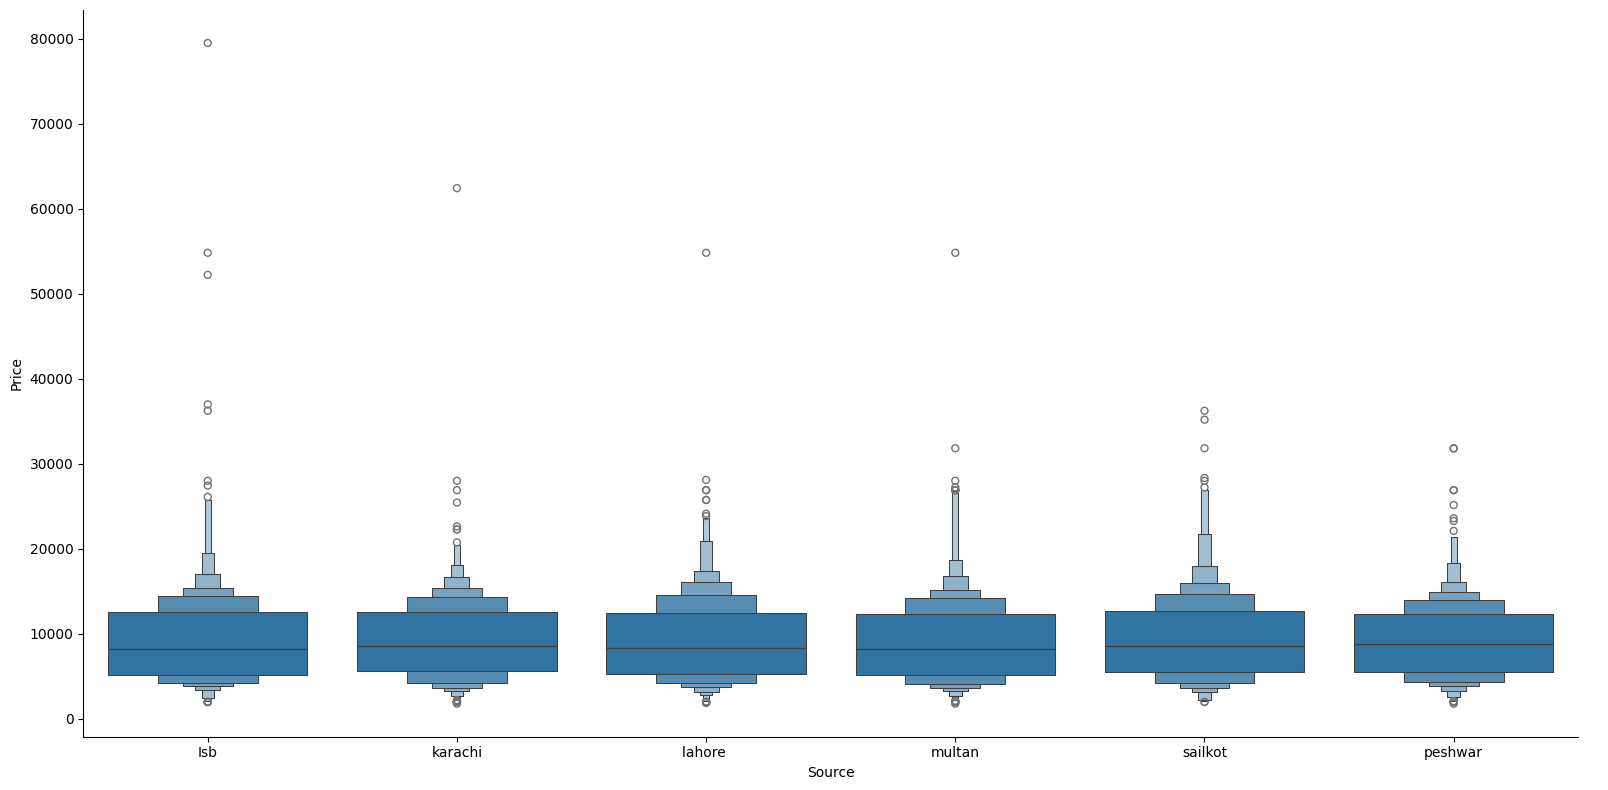

In [24]:
#Visualize Data
sns.catplot(y = "Price", x = "Source", data = data.sort_values("Price", ascending = False), kind = "boxen", height = 8, aspect = 2)
plt.show()

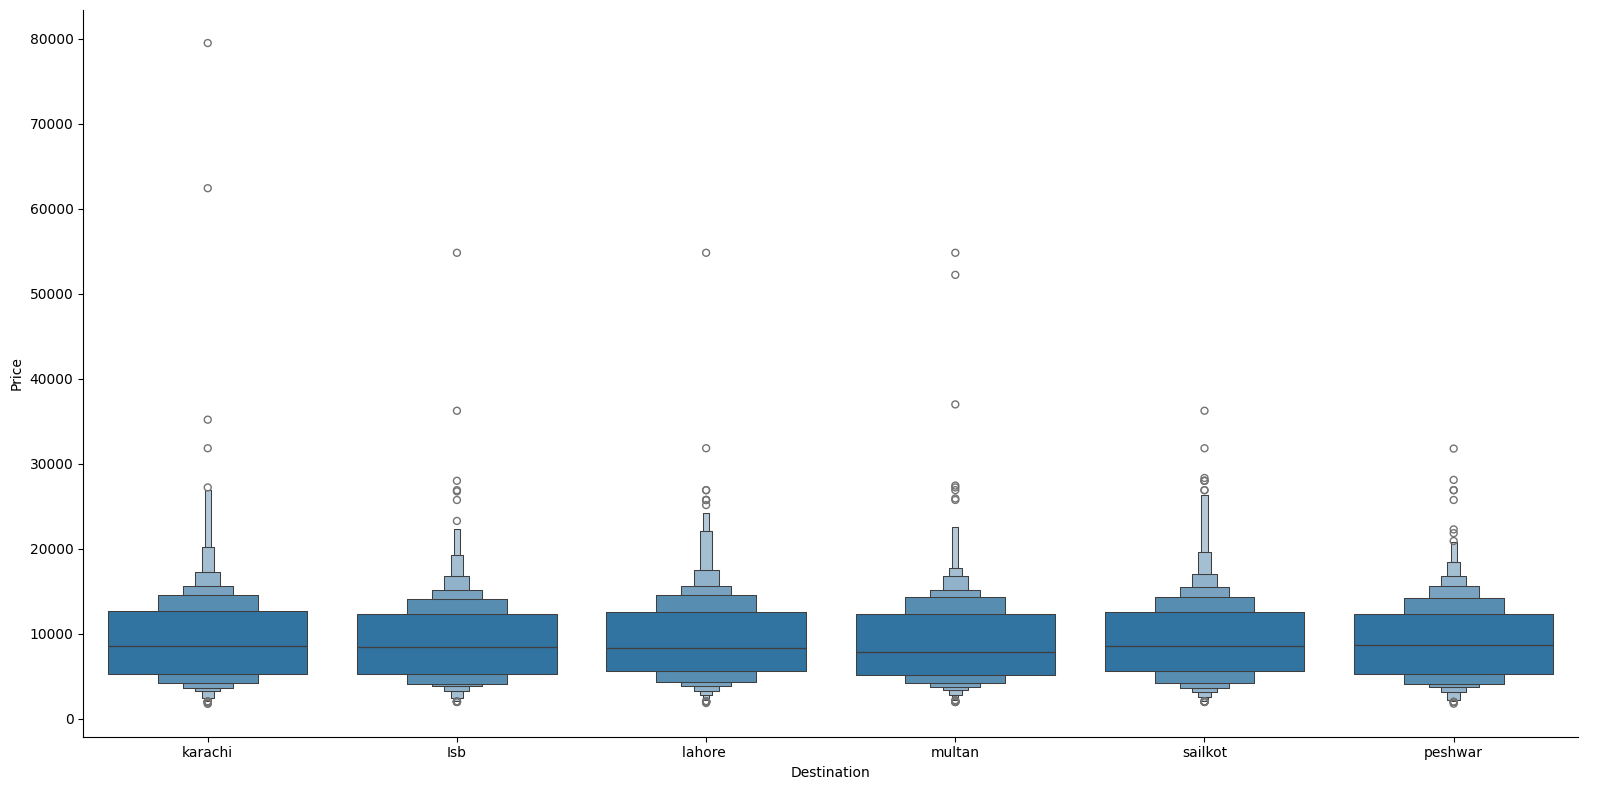

In [25]:
sns.catplot(y = "Price", x = "Destination", data = data.sort_values("Price", ascending = False), kind = "boxen", height = 8, aspect = 2)
plt.show()


In [26]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,PIA,24/03/2019,lahore,peshwar,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,AIRSAIL,1/05/2019,multan,Isb,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,PIA.,9/06/2019,karachi,sailkot,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,Airblue.,12/05/2019,peshwar,lahore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,Serene Air.,01/03/2019,Isb,multan,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [27]:
data.drop(['Additional_Info'], axis=1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,PIA,24/03/2019,lahore,peshwar,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,AIRSAIL,1/05/2019,multan,Isb,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662
2,PIA.,9/06/2019,karachi,sailkot,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882
3,Airblue.,12/05/2019,peshwar,lahore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218
4,Serene Air.,01/03/2019,Isb,multan,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302
...,...,...,...,...,...,...,...,...,...,...
5994,Qatar Airways.,9/06/2019,multan,multan,CCU → DEL → BLR,07:10,10:45 10 Jun,27h 35m,1 stop,9397
5995,Qatar Airways.,6/04/2019,karachi,karachi,DEL → BOM → COK,10:35,15:35,5h,1 stop,5073
5996,Qatar Airways.,24/03/2019,peshwar,peshwar,CCU → GAU → IMF → DEL → BLR,05:55,23:15,17h 20m,3 stops,15145
5997,Qatar Airways.,24/06/2019,Isb,Isb,DEL → BOM → COK,09:15,19:15,10h,1 stop,8099


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          5999 non-null   object
 1   Date_of_Journey  5999 non-null   object
 2   Source           5999 non-null   object
 3   Destination      5999 non-null   object
 4   Route            5999 non-null   object
 5   Dep_Time         5999 non-null   object
 6   Arrival_Time     5999 non-null   object
 7   Duration         5999 non-null   object
 8   Total_Stops      5999 non-null   object
 9   Additional_Info  5999 non-null   object
 10  Price            5999 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 515.7+ KB


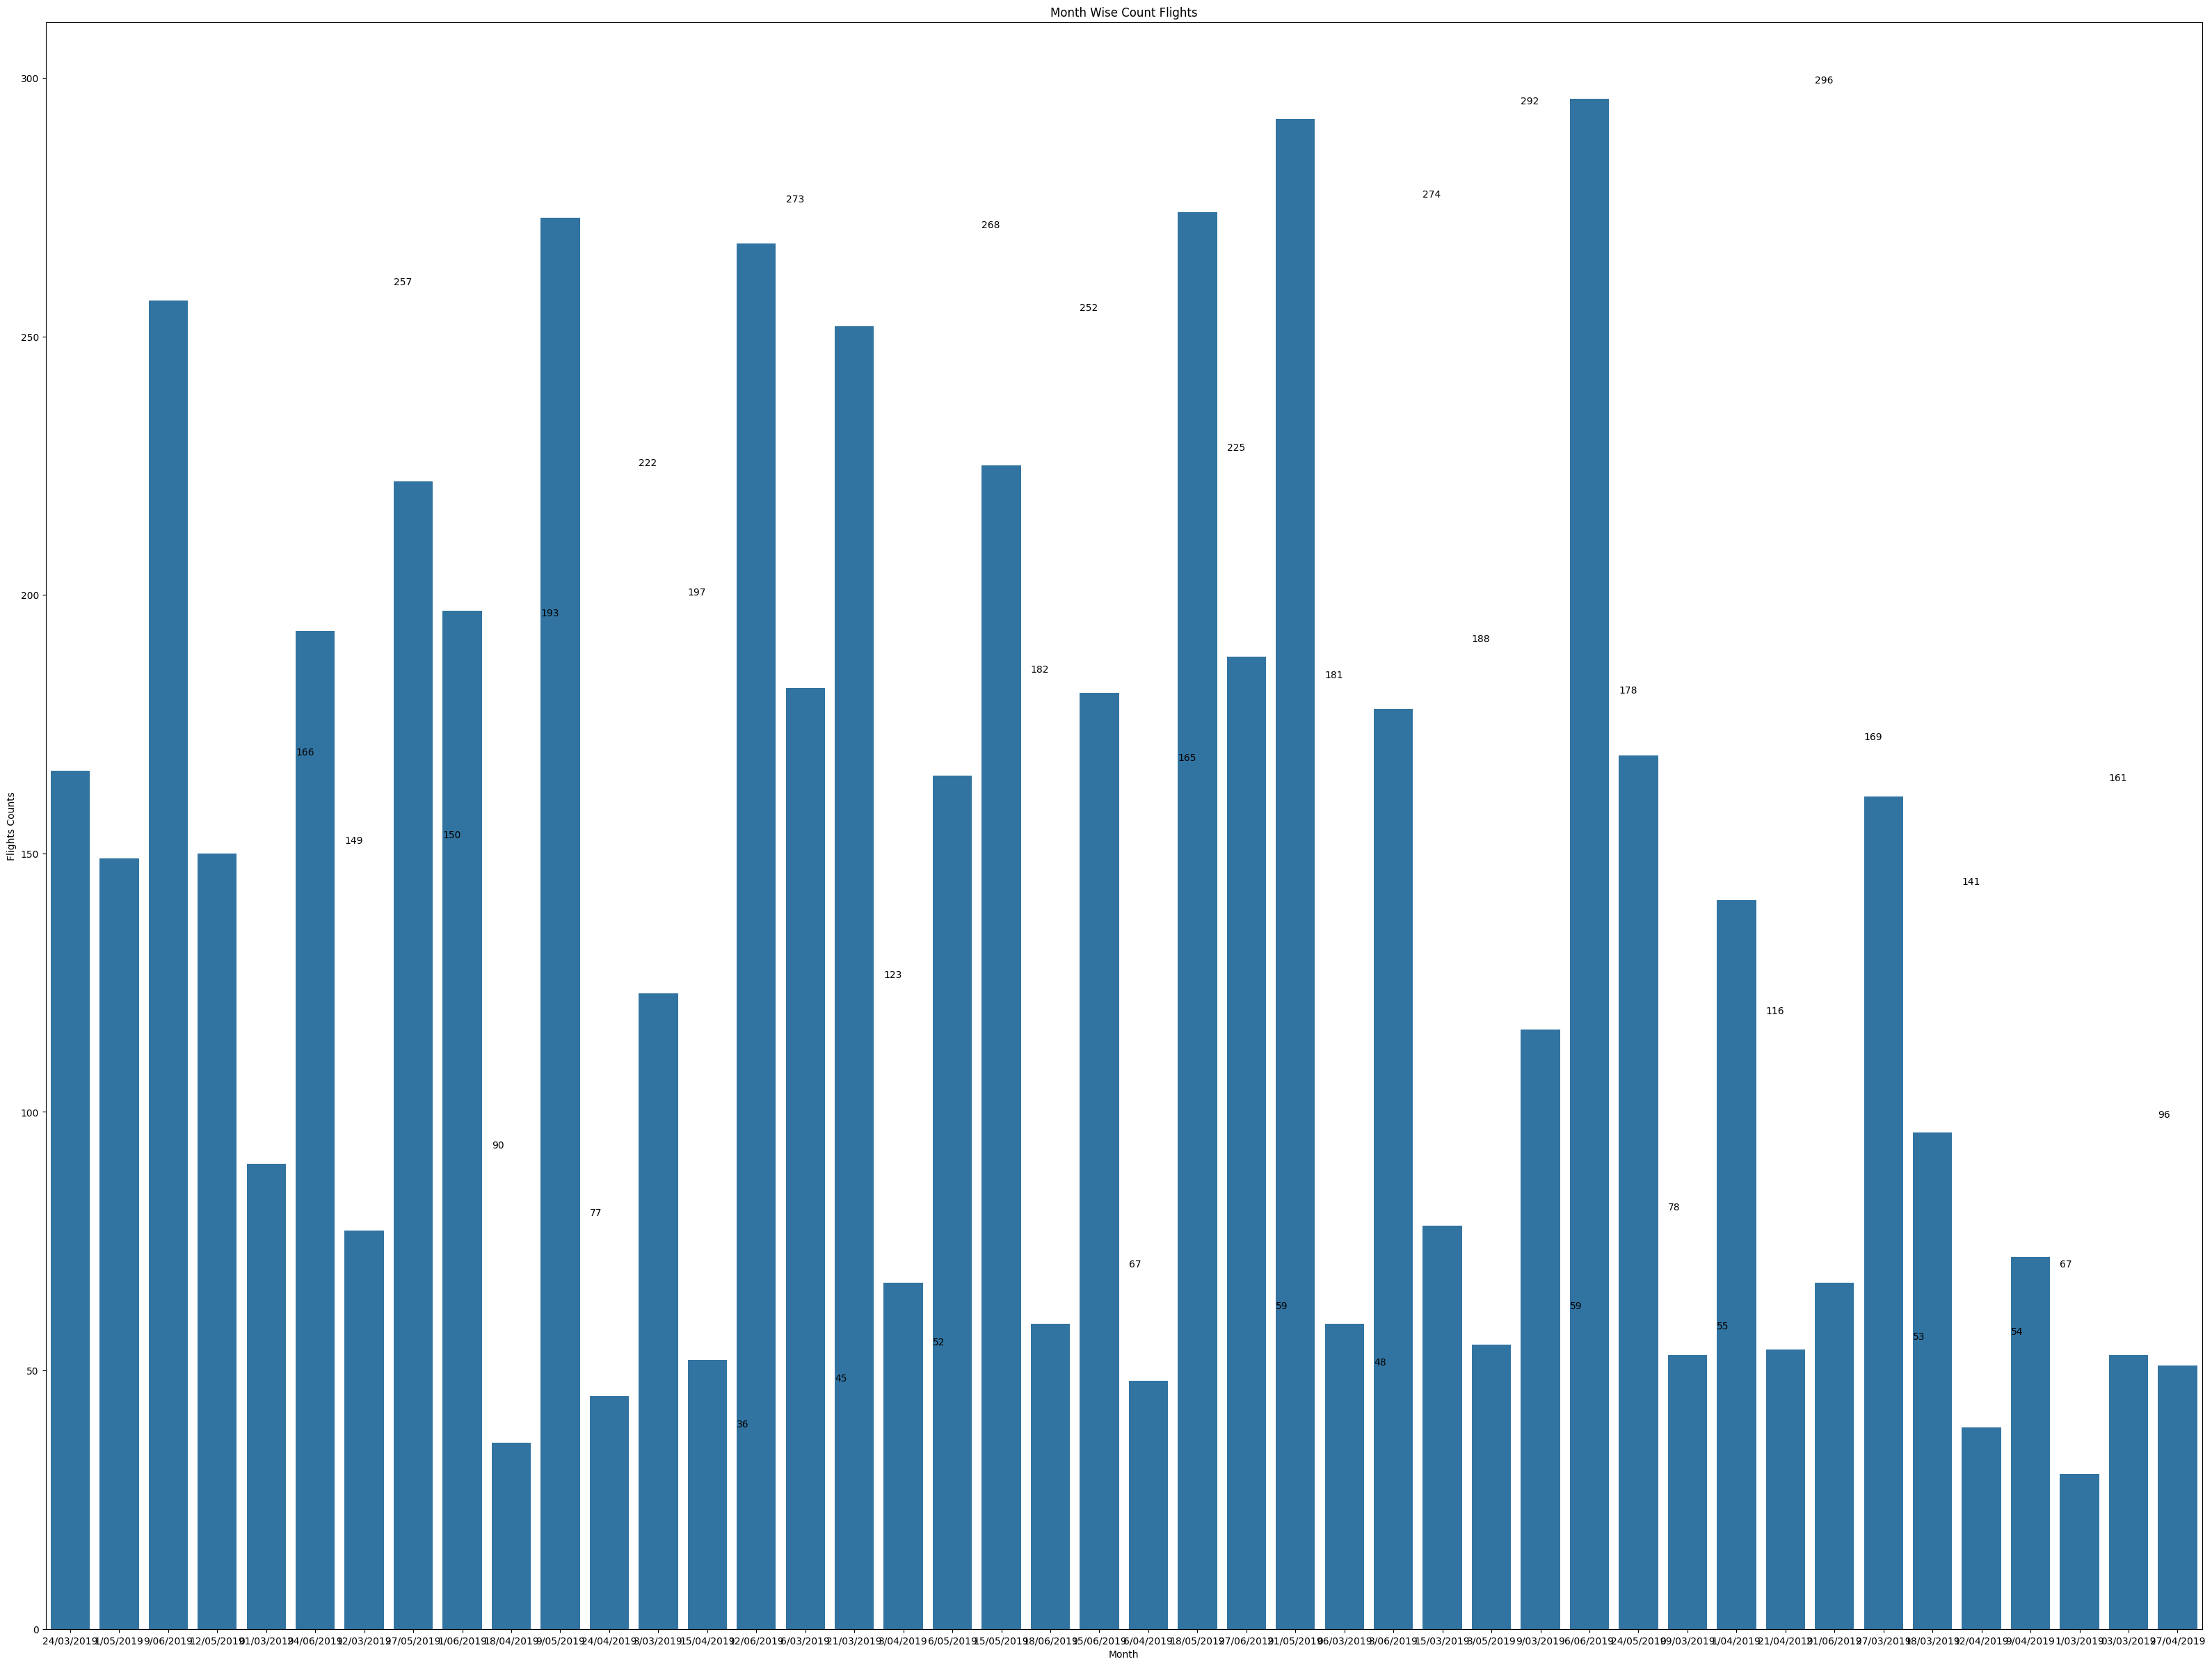

In [34]:
plt.figure(figsize = (40,30))
plt.title('Month Wise Count Flights')
ax = sns.countplot(x = 'Date_of_Journey', data = data)
plt.xlabel('Month')
plt.ylabel('Flights Counts')
for count in ax.patches:
    ax.annotate(int(count.get_height()), (count.get_x() + 5, count.get_height() + 3))

In [35]:
# Apply the default theme
sns.set_theme()

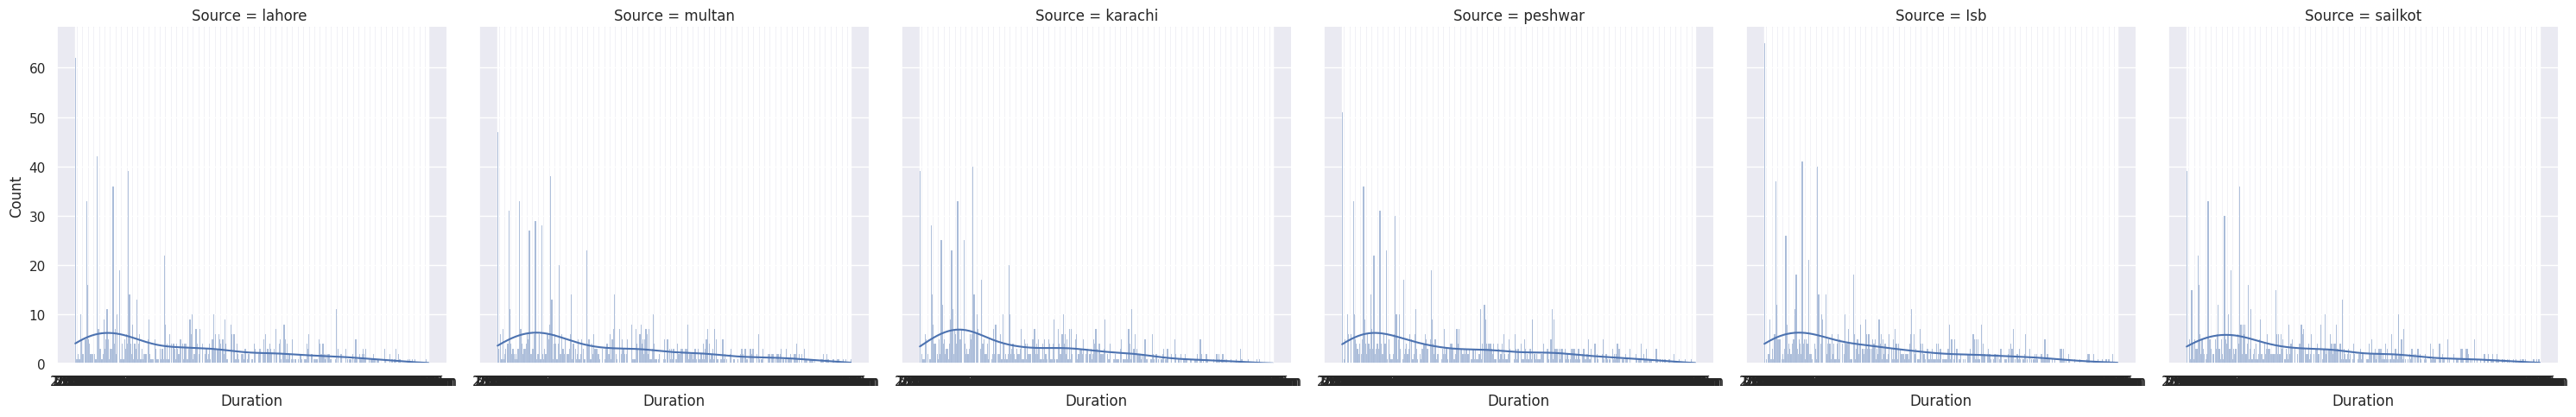

In [36]:
sns.displot(data = data, x = "Duration", col = "Source", kde = True)

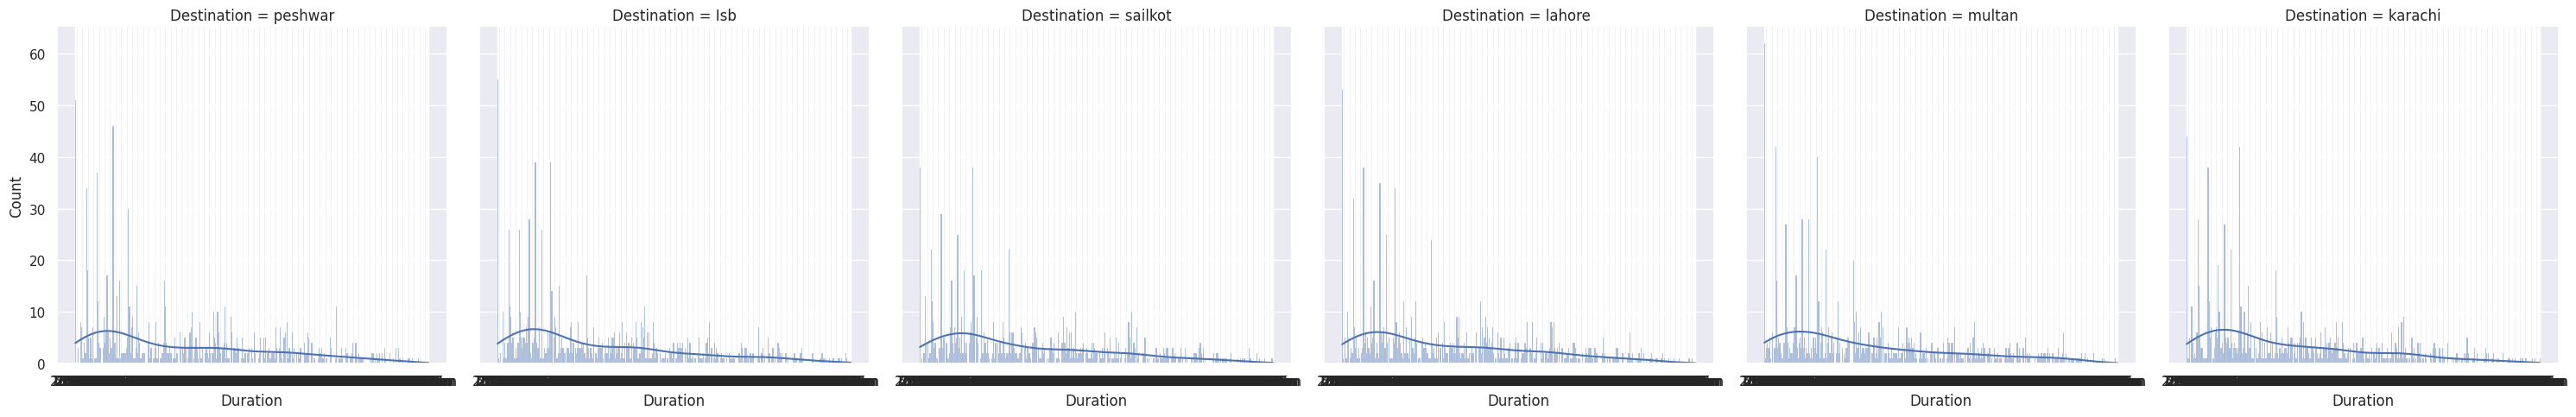

In [37]:
sns.displot(data = data, x = "Duration", col = "Destination", kde = True)

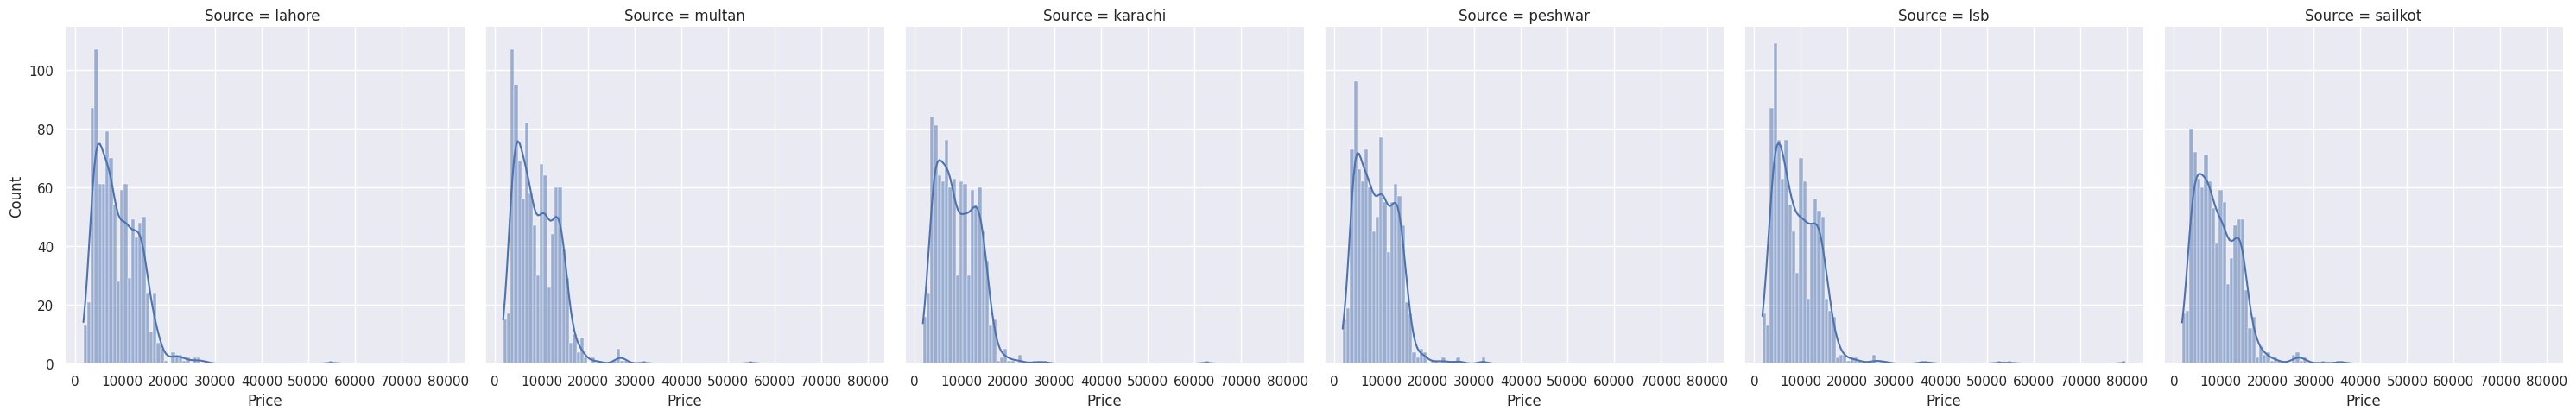

In [39]:
sns.displot(data = data, x = "Price", col = "Source", kde = True)

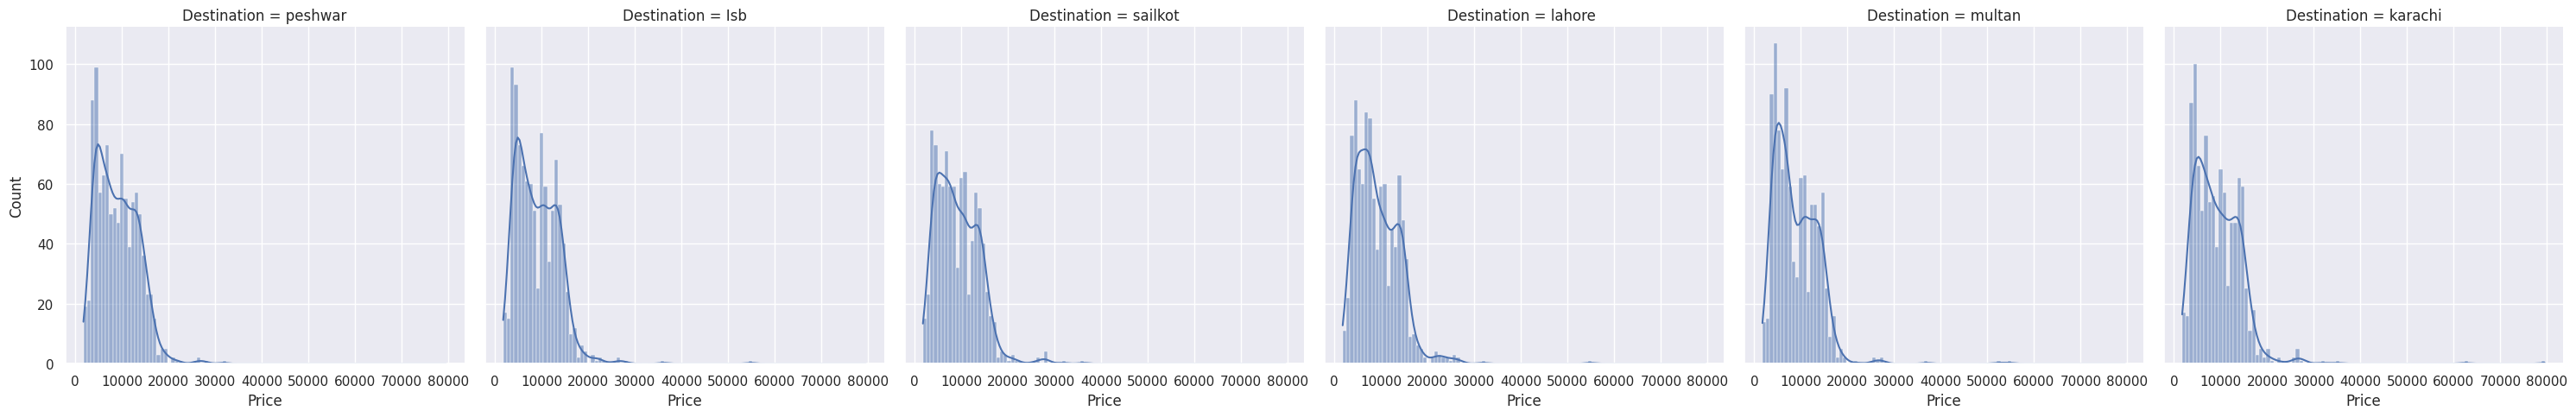

In [40]:
sns.displot(data = data, x = "Price", col = "Destination", kde = True)

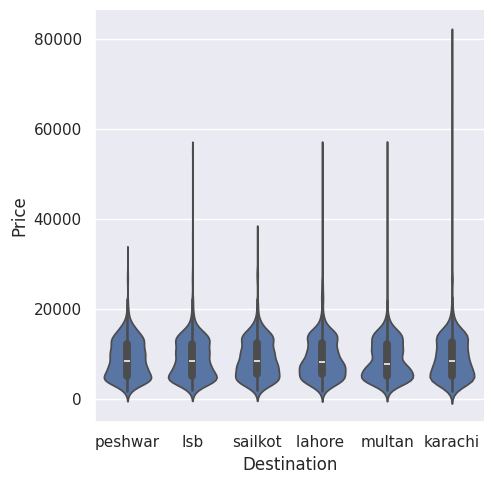

In [41]:
sns.catplot(data = data, kind = "violin", x = "Destination", y = "Price")


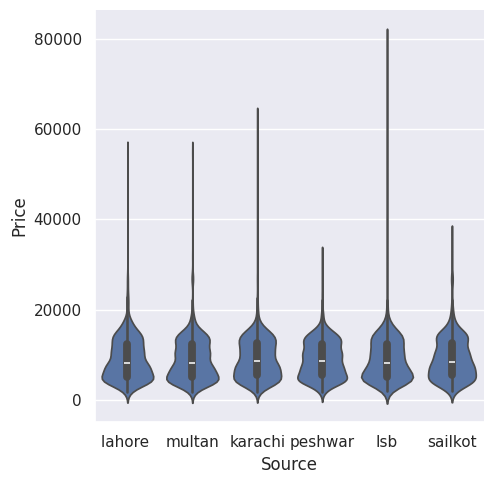

In [42]:
sns.catplot(data = data, kind = "violin", x = "Source", y = "Price")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'PIA'),
  Text(1, 0, 'AIRSAIL'),
  Text(2, 0, 'PIA.'),
  Text(3, 0, 'Airblue.'),
  Text(4, 0, 'Serene Air.'),
  Text(5, 0, 'Saudia.'),
  Text(6, 0, 'Arabia.'),
  Text(7, 0, 'AirSial.'),
  Text(8, 0, 'Gulf Air.'),
  Text(9, 0, 'Qatar Airways.')])

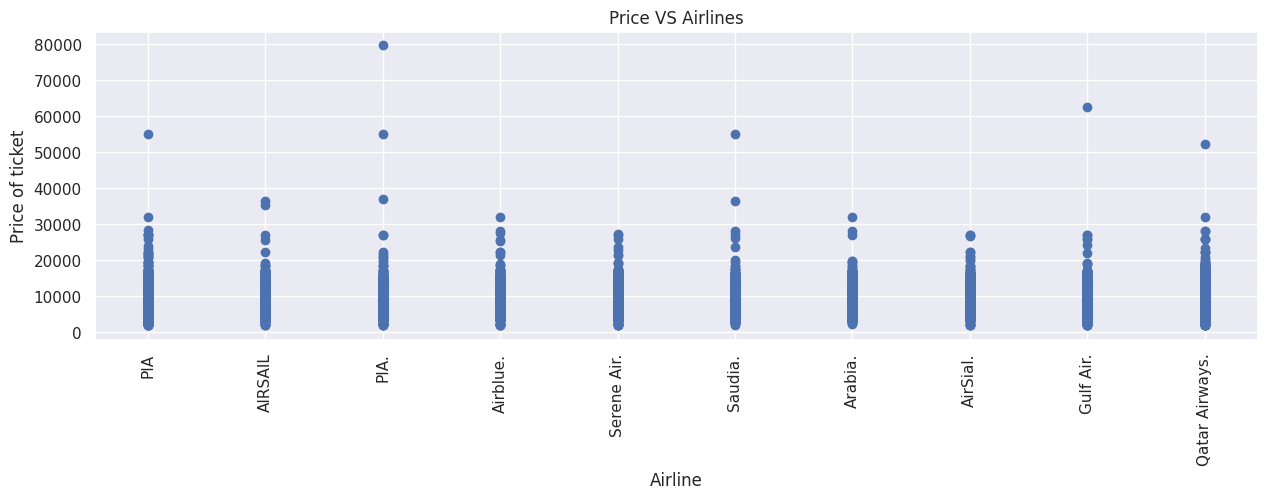

In [43]:
plt.figure(figsize = (15,4))
plt.title('Price VS Airlines')
plt.scatter(data['Airline'], data['Price'])
plt.xticks
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)